In [1]:
import torch

In [2]:
t3=torch.tensor([[1.,2,3],[4,5,6],[7,8,9]])

In [3]:
t3

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [4]:
t3.shape

torch.Size([3, 3])

In [5]:
import torchvision
from torchvision.datasets import MNIST

In [6]:
dataset=MNIST(root='data/',download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [7]:
len(dataset)

60000

In [8]:
test_dataset=MNIST(root='data/',train=False)
len(test_dataset)

10000

In [9]:
from torch.utils.data.dataloader import DataLoader

batch_size=100
test_dl = DataLoader(test_dataset, batch_size, shuffle=True, num_workers=4, pin_memory=True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [10]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7FC7D62C7BD0>, 5)

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

Lable :  5


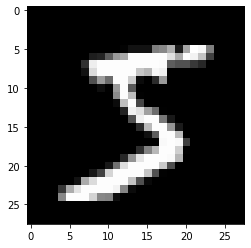

In [12]:
image,label=dataset[0]
plt.imshow(image,cmap='gray')
print("Lable : ",label)

Label :  5


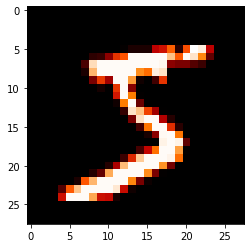

In [13]:
image,label=dataset[0]
plt.imshow(image,cmap='gist_heat')
print("Label : ", label)

In [14]:
import torchvision.transforms as transforms

In [15]:
dataset=MNIST(root='data/',train=True,transform=transforms.ToTensor())

In [16]:
img_tensor,label=dataset[0]
print(img_tensor.shape,label)

torch.Size([1, 28, 28]) 5


In [17]:
from torch.utils.data import random_split

train1_ds,train2_ds, val_ds = random_split(dataset, [25000, 25000,10000])
len(train1_ds),len(train2_ds), len(val_ds)

(25000, 25000, 10000)

In [18]:
from torch.utils.data.dataloader import DataLoader

batch_size=100

In [19]:
train1_dl = DataLoader(train1_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
train2_dl = DataLoader(train2_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size*2, num_workers=2, pin_memory=True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [20]:
def apply_kernel(image, kernel):
    ri, ci = image.shape       # image dimensions
    rk, ck = kernel.shape      # kernel dimensions
    ro, co = ri-rk+1, ci-ck+1  # output dimensions
    output = torch.zeros([ro, co])
    for i in range(ro): 
        for j in range(co):
            output[i,j] = torch.sum(image[i:i+rk,j:j+ck] * kernel)
    return output

In [21]:
import torch.nn as nn
import torch.nn.functional as F

In [22]:
import torch
import torchvision
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
%matplotlib inline

In [23]:
class Network(nn.Module):

    def __init__(self):
        super(Network, self).__init__() 
        self.convolutaional_neural_network_layers = nn.Sequential(
                nn.Conv2d(in_channels=1, out_channels=12, kernel_size=3, padding=1, stride=1),  
                nn.ReLU(), 
                nn.MaxPool2d(kernel_size=2), 
                nn.Conv2d(in_channels=12, out_channels=24, kernel_size=3, padding=1, stride=1),
                nn.ReLU(),
                nn.MaxPool2d(kernel_size=2) 
                
        )

        self.linear_layers = nn.Sequential(
                nn.Linear(in_features=24*7*7, out_features=64),          
                nn.ReLU(),
                nn.Dropout(p=0.2), 
                nn.Linear(in_features=64, out_features=10) 
        )

    def forward(self, x):
        x = self.convolutaional_neural_network_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x

In [24]:
from torch import optim
device = ("cuda" if torch.cuda.is_available() else "cpu")
model = Network()
model.to(device)

Network(
  (convolutaional_neural_network_layers): Sequential(
    (0): Conv2d(1, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=1176, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [25]:
optimizer = optim.SGD(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

In [26]:
def train(model,data,val_dl,epochs,optimise):
  
    
    train_loss, val_loss = [], []
    accuracy_total_train, accuracy_total_val = [], []
    #model.to(device)
    model=model.to(device)
    #data.to(device)
    for epoch in range(epochs):
      
        total_train_loss = 0
        total_val_loss = 0

        model.train()
        
        total = 0
        # training our model
        for idx, (image, label) in enumerate(data):

            image, label = image.to(device), label.to(device)
            
            optimise.zero_grad()

            pred = model(image)

            loss = criterion(pred, label)
            total_train_loss += loss.item()

            loss.backward()
            optimise.step()

            pred = torch.nn.functional.softmax(pred, dim=1)
            for i, p in enumerate(pred):
                if label[i] == torch.max(p.data, 0)[1]:
                    total = total + 1
                    
        accuracy_train = total / len(train1_ds)
        accuracy_total_train.append(accuracy_train)

        total_train_loss = total_train_loss / (idx + 1)
        train_loss.append(total_train_loss)
        
        # validating our model
        model.eval()
        total = 0
        for idx, (image, label) in enumerate(val_dl):
            image, label = image.cuda(), label.cuda()
            pred = model(image)
            loss = criterion(pred, label)
            total_val_loss += loss.item()

            pred = torch.nn.functional.softmax(pred, dim=1)
            for i, p in enumerate(pred):
                if label[i] == torch.max(p.data, 0)[1]:
                    total = total + 1

        accuracy_val = total / len(val_ds)
        accuracy_total_val.append(accuracy_val)

        total_val_loss = total_val_loss / (idx + 1)
        val_loss.append(total_val_loss)

        
        if epoch%2==0:
          print( "Train accuracy: {:.4f}  ".format(accuracy_train),"Val accuracy: {:.4f}  ".format(accuracy_val))


In [27]:
def test(model,datatest):
        val_loss = []
        accuracy_total_val = []
        model.to(device)
        model.eval()
        total = 0
        total_val_loss=0
        for idx, (image, label) in enumerate(val_dl):
            image, label = image.cuda(), label.cuda()
            pred = model(image)
            loss = criterion(pred, label)
            total_val_loss += loss.item()

            pred = torch.nn.functional.softmax(pred, dim=1)
            for i, p in enumerate(pred):
                if label[i] == torch.max(p.data, 0)[1]:
                    total = total + 1

        accuracy_val = total / len(val_ds)
        accuracy_total_val.append(accuracy_val)

        total_val_loss = total_val_loss / (idx + 1)
        val_loss.append(total_val_loss)

        # if epoch%2==0:
        print( "Test accuracy: {:.4f}  ".format(accuracy_val))


In [28]:
def server_aggregate(global_model, client_models):
    global_dict = global_model.state_dict()
    for k in global_dict.keys():
        global_dict[k] = torch.stack([client_models[i].state_dict()[k].float() for i in range(len(client_models))], 0).mean(0)
    global_model.load_state_dict(global_dict)
    for client_model in client_models:
        client_model.load_state_dict(global_model.state_dict())

In [29]:
#model = Network()
import copy

In [30]:
model1 = copy.deepcopy(model)
model2 = copy.deepcopy(model)

In [31]:
client_models = [model1, model2]
data=[train1_dl,train2_dl]

In [32]:
optim1 = optim.Adam(model1.parameters(), lr=0.01)
optim2 = optim.Adam(model2.parameters(), lr=0.01)

optims = [optim1, optim2]

In [33]:
globalepoch=2
localepochs=2
for i in range(globalepoch):
    for index,client_model in enumerate(client_models):
      
      train(client_model,data[index],val_dl,localepochs,optims[index])
    server_aggregate(model, client_models)
    optimizer = optim.SGD(model.parameters(), lr=0.01)
    test(model,test_dl)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Train accuracy: 0.9001   Val accuracy: 0.9726  
Train accuracy: 0.9010   Val accuracy: 0.9722  
Test accuracy: 0.9584  
Train accuracy: 0.9705   Val accuracy: 0.9786  
Train accuracy: 0.9656   Val accuracy: 0.9799  
Test accuracy: 0.9822  


In [34]:
test(model,test_dl)

Test accuracy: 0.9822  
